In [25]:
import math

In [26]:
x_inputs = [4.0, -1.0]
k_pre = [1.0, 1.0, 1.0]
h_hidden = [1.0, 1.0, 1.0]
w_weights = [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]] # input : x_input x k_hidden : 2 x 3
v_weights = [1.0, 1.0, 1.0]
b_bias = 1
c_bias = 1
t_target = 1.2
y = 1.5

In [27]:
def sigmoid(x):
    return 1 / (1 + (math.exp(-x)))

In [28]:
def softmax(i, outputs):
    # print(i, outputs)
    den = 0
    for j in range(len(outputs)):
        den += math.e ** outputs[j]
        
    if den == 0:
        return 0
    
    return (math.e ** outputs[i]) / den

In [8]:
# def forward(y):
#     for j in range(3): # num first layer nodes
#         for i in range(2): # num inputs
#             k_pre[j] += w_weights[i][j] * x_inputs[i]
#         k_pre[j] += b_bias
#     print(f'k_pre: {k_pre}')
    
#     for i in range(3):
#         h_hidden[i] = sigmoid(k_pre[i])
#     print(f'h_hidden: {h_hidden}') 
    
#     for i in range(3):
#         y += h_hidden[i] * v_weights[i]
     
#     y += c_bias
#     print(f'y: {y}')
    
#     loss = (y - t_target) ** 2
#     print(f'loss: {loss}')  
    
#     return loss

In [9]:
# forward(y)

In [10]:
dldv = [0.0, 0.0, 0.0]
dldh = [0.0, 0.0, 0.0]
dldc = 0.0
dldk = [0.0, 0.0, 0.0]
dldw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
dldb = [0.0, 0.0, 0.0]

In [11]:
# def backward():
#     dldy = 2 * (y - t)
#     print(f'dldy: {dldy}')
#     for i in range(3):
#         # these two are the deriv from y=v1h1 + v2h2 +..
#         dldv[i] = dldy * h_hidden[i] # dldv = dldy * dydv
#         dldh[i] = dldy * v_weights[i] # dldh = dldy * dydh
        
#     print(f'dldv: {dldv}')
#     print(f'dldh: {dldh}')
    
#     dldc = dldy
#     print(f'dldc: {dldc}')
    
#     for i in range(3):
#         dldk[i] = dldh[i] * h_hidden[i] * (1 - h_hidden[i]) # dldk = dldh * dhdk
#         # dhdk is the deriv of sigmoid func
    
#     print(f'dldk: {dldk}')
        
#     for j in range(3):
#         for i in range(2):
#             dldw[i][j] = dldk[j] * x_inputs[i] # dldw = dldk * dkdw
#             # dkdw is deriv of k1 = w1x1 + w2x2 + ..
#         dldb[j] = dldk[j]

#     print(f'dldw: {dldw}')
#     print(f'dldb: {dldb}')
            
    

In [12]:
# backward()

### Above is the network from the slides

In [24]:
def cross_entropy(y, t):
    # if abs(t - y) < 1.0e-15 or y == 0:
    #     return 1.0e-15
    # print(y,t)
    ce = -1 * t * math.log(y)
    # print(y,t,ce)
    return ce

In [29]:
import random


In [30]:
def rand_weights(r, c):
    arr_r = []
    for j in range(r):
        arr_c = []
        for i in range(c):
            arr_c.append(random.uniform(-10, 10))
        arr_r.append(arr_c)
    return arr_r
            
    
rand_weights(3, 2)

[[6.257306904087134, 6.308485959384342],
 [6.338035923436525, 2.675551066603548],
 [-3.895993194508998, 4.900830834063052]]

In [45]:
class MLP:
    def __init__(self):
        # self.k_pre = [0.0, 0.0, 0.0]
        # self.h_hidden = [0.0, 0.0, 0.0]
        # self.w_weights =  [[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]] # rand_weights(2, 3)  # input : x_input x k_hidden : 2 x 3
        # self.v_weights = [[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]]  # rand_weights(3, 2) # # 
        # self.b_weights = [0.0, 0.0, 0.0]
        # self.c_weights = [0.0, 0.0]
        # self.y_outputs = [0.0, 0.0]
        # self.o_raw = [0.0, 0.0]
        # self.loss = [0.0, 0.0]
        
        # self.dldv = [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
        # self.dldh = [0.0, 0.0, 0.0]
        # self.dldc = [0.0, 0.0]
        # self.dldk = [0.0, 0.0, 0.0]
        # self.dldw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
        # self.dldb = [0.0, 0.0, 0.0]
        # self.dldo = [0.0, 0.0]
        # self.dldy = [0.0, 0.0]
        self.logs = True
    
    def forward(self, x_inputs, w_weights, b_weights, v_weights, c_weights):
        k_pre = [0.0, 0.0, 0.0]
        h_hidden = [0.0, 0.0, 0.0]
        o_raw = [0.0, 0.0]
        y_outputs = [0.0, 0.0]
        
        if self.logs: print(f'x_inputs: {x_inputs}')
        
        for j in range(3): 
            for i in range(2):
                k_pre[j] += w_weights[i][j] * x_inputs[i]
            k_pre[j] += b_weights[j]
        if self.logs: print(f'k_pre: {k_pre}') 
        
        for i in range(3):
            h_hidden[i] = sigmoid(k_pre[i])
        if self.logs: print(f'h_hidden: {h_hidden}') 
        
        for j in range(2): 
            for i in range(3): 
                o_raw[j] += v_weights[i][j] * h_hidden[i] 
            o_raw[j] += c_weights[j]
        if self.logs: print(f'o_raw: {o_raw}') 
        
        
        for i in range(2):
            y_outputs[i] = softmax(i, o_raw)
        if self.logs: print(f'y_outputs: {y_outputs}') 
        
        return y_outputs, h_hidden
            
        
    def loss(self, y_outputs, t_targets):
        print(y_outputs, t_targets)
        loss = 0
        for i in range(2):
            ce = cross_entropy(y_outputs[i], t_targets[i])
            print(ce)
            loss += ce
        if self.logs: print(f'loss: {loss}')  
        
        return loss
        
    def backward(self, y_outputs, t_targets, h_hidden, v_weights, x_inputs, dldw, dldb, dldv, dldc):
        dldh = [0.0, 0.0, 0.0]
        dldk = [0.0, 0.0, 0.0]
        dldo = [0.0, 0.0]
        # dldy = [0.0, 0.0]
        
        for i in range(2):
            dldo[i] += y_outputs[i] - t_targets[i]
        if self.logs: print(f'dldo: {dldo}')
        
        for j in range(3):
            for i in range(2):
                dldv[j][i] += dldo[i] * h_hidden[j]
                dldh[j] += dldo[i] * v_weights[j][i]      
        if self.logs: print(f'dldv: {dldv}')
        if self.logs: print(f'dldh: {dldh}')
        
        dldc = dldo
        if self.logs: print(f'dldc: {dldc}')
        
        for i in range(3):
            dldk[i] += dldh[i] * h_hidden[i] * (1 - h_hidden[i]) 

        if self.logs: print(f'dldk: {dldk}')
            
        # print('stuff: ', dldk, x_inputs)
        for j in range(3):
            for i in range(2):
                dldw[i][j] += dldk[j] * x_inputs[i] 
            
        dldb = dldk

        if self.logs: print(f'dldw: {dldw}')
        if self.logs: print(f'dldb: {dldb}')
        
        return dldw, dldb, dldv, dldc
        
    def set_inputs(self, x_inputs):
        self.x_inputs = x_inputs
        
    def set_targets(self, t_targets):
        self.t_targets = t_targets
        
    def set_learning_rate(self, lr):
        self.lr = lr
        
    def sgd(self, lr, w_weights, b_weights, v_weights, c_weights, dldw, dldb, dldv, dldc):
        for j in range(3):
            for i in range(2):
                diff = -lr * dldv[j][i]
                # if logs: print(f'diff v: {diff}')
                v_weights[j][i] += diff
                
        for j in range(2):
            for i in range(3):
                diff = -lr * dldw[j][i]
                # if logs: print(f'diff w: {diff}')
                w_weights[j][i] += diff
                
        for j in range(2):
            diff = -lr * dldc[j]
            # if logs: print(f'diff w: {diff}')
            c_weights[j] += diff
        
        for j in range(3):
            diff = -lr * dldb[j]
            # if logs: print(f'diff w: {diff}')
            b_weights[j] += diff
            
        return v_weights, w_weights, c_weights, b_weights
            
        

In [48]:
# mlp = MLP()
# lr = 0.1
# loss_arr = []

# dldh = [0.0, 0.0, 0.0]
# dldk = [0.0, 0.0, 0.0]
# dldo = [0.0, 0.0]
# dldy = [0.0, 0.0]

# dldw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
# dldv = [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
# dldb = [0.0, 0.0, 0.0]
# dldc = [0.0, 0.0]
     
# w_weights = [[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]]
# b_weights = [0.0, 0.0, 0.0] 
# v_weights = [[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]]  # rand_weights(3, 2) # # 
# c_weights = [0.0, 0.0]
       
# for i in range(1):
#     x_inputs = [1, -1]
    
    
    
#     y_outputs = mlp.forward(x_inputs, w_weights, b_weights, v_weights, c_weights)
#     loss = mlp.loss(y_outputs, t_targets)
    
#     print(loss)
    
#     dldw, dldb, dldv, dldc = mlp.backward(y_outputs, t_targets)
    
#     mlp.sgd(lr, w_weights, b_weights, v_weights, c_weights, dldw, dldb, dldv, dldc)
    
#     loss_arr.append(loss)
    
    
a_learning_rate = 1e-4
mlp = MLP()
mlp.set_learning_rate(a_learning_rate)

losses = []
epochs = 5

dldh = [0.0, 0.0, 0.0]
dldk = [0.0, 0.0, 0.0]
dldo = [0.0, 0.0]
dldy = [0.0, 0.0]

dldw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
dldv = [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
dldb = [0.0, 0.0, 0.0]
dldc = [0.0, 0.0]
     
w_weights = [[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]]
b_weights = [0.0, 0.0, 0.0] 
v_weights = [[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]]  # rand_weights(3, 2) # # 
c_weights = [0.0, 0.0]

for j in range(1):
    loss_avg = []
    
    dldw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
    dldb = [0.0, 0.0, 0.0]
    dldv = [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
    dldc = [0.0, 0.0]
    
    for i in range(1):
        t_targets = target_arr(num_cls=2, t=0)
        
        x_inputs = [1, -1]
        
        y_outputs, h_hidden = mlp.forward(x_inputs, w_weights, b_weights, v_weights, c_weights)
        print('yes', y_outputs, h_hidden)
        loss = mlp.loss(y_outputs, t_targets)
        
        w_pri, b_pri, v_pri, c_pri = mlp.backward(y_outputs, t_targets, h_hidden, v_weights, x_inputs, dldw, dldb, dldv, dldc)
        
        dldw += w_pri
        dldb += b_pri
        dldv += v_pri
        dldc += c_pri
        
        
        if i % 1000 == 0:
            losses.append(loss)
            
    v_weights, w_weights, c_weights, b_weights = mlp.sgd(a_learning_rate, w_weights, b_weights, v_weights, c_weights, dldw, dldb, dldv, dldc)

x_inputs: [1, -1]
k_pre: [2.0, 2.0, 2.0]
h_hidden: [0.8807970779778823, 0.8807970779778823, 0.8807970779778823]
o_raw: [-0.8807970779778823, -0.8807970779778823]
y_outputs: [0.5, 0.5]
yes [0.5, 0.5] [0.8807970779778823, 0.8807970779778823, 0.8807970779778823]
[0.5, 0.5] [1, 0]
0.6931471805599453
-0.0
loss: 0.6931471805599453
dldo: [-0.5, 0.5]
dldv: [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
dldh: [0.0, 0.0, 0.0]
dldc: [-0.5, 0.5]
dldk: [0.0, 0.0, 0.0]
dldw: [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
dldb: [0.0, 0.0, 0.0]


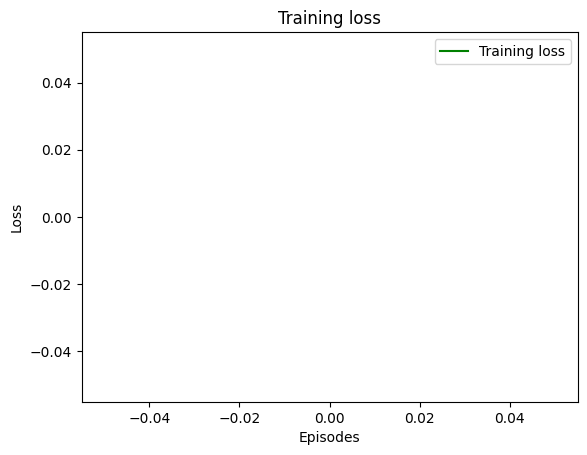

In [39]:
loss_train = loss_arr
episodes = range(0,len(loss_train))
plt.plot(episodes, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Episodes')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(mlp.w_weights, mlp.v_weights)

AttributeError: 'MLP' object has no attribute 'w_weights'

In [ ]:
mlp.set_learning_rate(0.001)
mlp.sgd()
print(mlp.w_weights, mlp.v_weights)


[[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]] [[1.0444802524378831, 0.955519747562117], [-0.955519747562117, -1.0444802524378831], [-0.955519747562117, -1.0444802524378831]]


In [ ]:
from data import load_synth
(xtrain, ytrain), (xval, yval), num_cls = load_synth()

In [ ]:
t_min = xtrain.min()
t_max = xtrain.max()

In [ ]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = arr.max() - arr.min()    
    for i in arr:
        temp = (((i - arr.min())*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [ ]:
norm_train_x = normalize(xtrain, 0, 1)
norm_val_x = normalize(xval, 0, 1)

norm_train_y = normalize(ytrain, 0, 1)
norm_val_y = normalize(yval, 0, 1)
print(yval[50])
print(norm_val_y[50])

1
1.0


In [ ]:
print(len(xtrain), len(ytrain))

60000 60000


In [20]:
def target_arr(num_cls, t):
    arr = [0] * num_cls
    arr[t] = 1
    return arr
# target_arr(2, 0)
# 0 if 0 == 1 else 1

In [38]:
import matplotlib.pyplot as plt

In [ ]:
a_learning_rate = 1e-4
mlp = MLP()
mlp.set_learning_rate(a_learning_rate)

losses = []
epochs = 5

dldh = [0.0, 0.0, 0.0]
dldk = [0.0, 0.0, 0.0]
dldo = [0.0, 0.0]
dldy = [0.0, 0.0]

dldw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
dldv = [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
dldb = [0.0, 0.0, 0.0]
dldc = [0.0, 0.0]
     
w_weights = [[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]]
b_weights = [0.0, 0.0, 0.0] 
v_weights = [[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]]  # rand_weights(3, 2) # # 
c_weights = [0.0, 0.0]

for j in range(epochs):
    loss_avg = []
    
    dldw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
    dldb = [0.0, 0.0, 0.0]
    dldv = [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
    dldc = [0.0, 0.0]
    
    for i in range(len(norm_train_x)):
        x1, x2 = norm_train_x[i]
        y = 0 if norm_train_y[i] == 1 else 1 
        t_targets = target_arr(num_cls, y)
        
        x_inputs = [x1, x2]
        
        y_outputs, h_hidden = mlp.forward(x_inputs, w_weights, b_weights, v_weights, c_weights)
        loss = mlp.loss(y_outputs, t_targets)
        
        w_pri, b_pri, v_pri, c_pri = mlp.backward(y_outputs, t_targets, h_hidden, v_weights, x_inputs, dldw, dldb, dldv, dldc)
        
        dldw += w_pri
        dldb += b_pri
        dldv += v_pri
        dldc += c_pri
        
        
        if i % 1000 == 0:
            losses.append(loss)
            
    v_weights, w_weights, c_weights, b_weights = mlp.sgd(a_learning_rate, w_weights, b_weights, v_weights, c_weights, dldw, dldb, dldv, dldc)
    
        

       
       
    # loss_arr.append(loss)
        
        # mlp.set_inputs([x1, x2])
        # mlp.set_targets(t_arr)
        
        # loss = mlp.forward()
        # loss_avg.append(loss)
    
            # mlp.backward()
        # mlp.sgd()
    
    # score = 0
    # tot = len(norm_val_x)
    # for i in range(tot):
    #     x1, x2 = norm_val_x[i]
    #     y = 0 if norm_val_y[i] == 1 else 1 
    #     t_arr = target_arr(num_cls, y)
        
    #     mlp.set_inputs([x1, x2])
    #     mlp.set_targets(t_arr)
        
    #     mlp.forward()
    #     if mlp.t_targets[0] == 1 and mlp.y_outputs[0] > 0.5:
    #         score += 1
    # print(f'accuracy: {score / tot}')
        
    # losses.append(sum(loss_avg)/len(loss_avg))
            

loss_train = losses
episodes = range(0,len(losses))
plt.plot(episodes, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

: 

In [ ]:
losses = []
score = 0
tot = len(norm_val_x)
for i in range(tot):
    x1, x2 = norm_val_x[i]
    y = 0 if norm_val_y[i] == 1 else 1 
    t_arr = target_arr(num_cls, y)
    
    mlp.set_inputs([x1, x2])
    mlp.set_targets(t_arr)
    
    loss = mlp.forward()
    losses.append(loss)
    # print(mlp.y_outputs, mlp.t_targets, loss)
    if mlp.t_targets[0] == 1 and mlp.y_outputs[0] > 0.5:
        score += 1
        
print(f'accuracy: {score / tot}')
        
# loss_train = losses
# episodes = range(0,len(losses))
# plt.plot(episodes, loss_train, 'g', label='Validation loss')
# plt.title('Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
import numpy

In [ ]:
# Continuing the code from where we left off.

# We need to import the math module for exp() and uniform from random module for initializing weights and biases.
import math
import random

# Since the neural network in the image has specific weights and biases assigned,
# we need to initialize our neurons with those exact values.
# For the purpose of this example, I will assume the values are known and manually input them.

# Assuming we have 2 inputs, 2 neurons with sigmoid activation in the hidden layer,
# and 2 neurons with softmax activation in the output layer as per the image.

# Neuron class definition
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def activate(self, inputs, activation_function):
        # Weighted sum of inputs + bias
        z = sum(weight * input for weight, input in zip(self.weights, inputs)) + self.bias
        return activation_function(z)

# Neural Network class definition
class NeuralNetwork:
    def __init__(self):
        # Manually setting the weights and biases to match the image provided
        # Hidden layer with sigmoid activation
        self.hidden_neurons = [
            Neuron(weights=[1, -1], bias=-1),
            Neuron(weights=[1, -1], bias=1),
        ]
        # Output layer with softmax activation
        self.output_neurons = [
            Neuron(weights=[1, 1], bias=0),
            Neuron(weights=[-1, -1], bias=0),
        ]

    def feedforward(self, inputs):
        # Pass inputs through the hidden layer
        hidden_layer_output = [neuron.activate(inputs, sigmoid) for neuron in self.hidden_neurons]

        # Pass hidden layer outputs through the output layer
        output_layer_output = [neuron.activate(hidden_layer_output, sigmoid) for neuron in self.output_neurons]

        # Apply softmax to the output layer's output
        return softmax(output_layer_output)

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + math.exp(-x))

def softmax(x):
    """Softmax activation function."""
    exps = [math.exp(i) for i in x]
    sum_exps = sum(exps)
    softmax_output = [j/sum_exps for j in exps]
    return softmax_output

# Let's now re-run the feedforward operation with these functions defined.
nn_output = nn.feedforward(input_data)
nn_output

# Instantiating the neural network
nn = NeuralNetwork()

# Example input to feedforward through the network
# Since the actual input values are not provided, we'll use dummy inputs
input_data = [1, -1]

# Feedforwarding through the network
nn_output = nn.feedforward(input_data)
nn_output




[0.6652479955699665, 0.33475200443003356]